In [8]:
import torch 
from torch import nn, optim
import torchvision 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt 
import math 
import numpy as np
%matplotlib inline 

In [27]:
#device = torch.device("cuda:0" if torch.cuda.is_available else "cpu")
device = torch.device('cpu')

In [31]:
num_epochs = 10 
num_classes = 10 # 0 - 9
learning_rate = 0.0005 
input_size = 28 * 28 
batch_size = 50
hidden_sizes = [128, 64] # arbitrary choice 

In [32]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])

In [33]:
train_data = datasets.MNIST('./', download=True, train=True, transform=transform)
test_data = datasets.MNIST('./', download=True, train=False, transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False , num_workers=2)

In [34]:
checkdata = iter(train_loader)
img, label = next(checkdata)
print(img.shape, label.shape)

torch.Size([50, 1, 28, 28]) torch.Size([50])


1
8
9
1
9
0
9
9
0


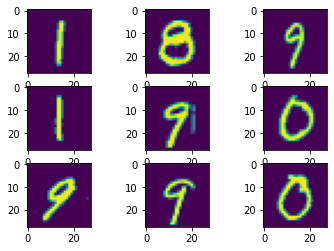

In [35]:
for i in range(1,10):
    print(label[i].item())
    plt.subplot(3, 3, i)
    plt.imshow(img[i][0]) #, cmap = "gray_r")    
plt.show()

In [36]:
class DigitRecognizer(nn.Module):

    def __init__(self, input_size, hidden_layers, num_classes):
        super(DigitRecognizer, self).__init__()
        self.input = nn.Linear(input_size, hidden_sizes[0])
        self.relu_0 = nn.ReLU()
        self.hidden1 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.relu_1 = nn.ReLU()
        self.output = nn.Linear(hidden_sizes[1], num_classes)
        
    def forward(self, X):
        model = self.input(X)
        model = self.relu_0(model)
        model = self.hidden1(model)
        model = self.relu_1(model)
        model = self.output(model)
        return model 

model = DigitRecognizer(input_size, hidden_sizes, num_classes)      
repr(model)

'DigitRecognizer(\n  (input): Linear(in_features=784, out_features=128, bias=True)\n  (relu_0): ReLU()\n  (hidden1): Linear(in_features=128, out_features=64, bias=True)\n  (relu_1): ReLU()\n  (output): Linear(in_features=64, out_features=10, bias=True)\n)'

In [37]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [38]:
samples = len(train_loader)
samples # seeing size of training samples

1200

In [39]:
model = model.to(device) # putting the model in the GPU

In [42]:
for epoch in range(1, num_epochs + 1):
    for step, (images, labels) in enumerate(train_loader, start = 1): # batch training loop 
        images = images.reshape(-1, 784).to(device) # flattening image to # of input nodes

        # passing data to be computed in the GPU 
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)

        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print("Epoch: {}/{}, step {}/ {}, loss: {:4f}".format(epoch, num_epochs, step, samples, loss.item()))

Streaming output truncated to the last 5000 lines.
Epoch: 6/10, step 1001/ 1200, loss: 0.095594
Epoch: 6/10, step 1002/ 1200, loss: 0.040408
Epoch: 6/10, step 1003/ 1200, loss: 0.211476
Epoch: 6/10, step 1004/ 1200, loss: 0.059720
Epoch: 6/10, step 1005/ 1200, loss: 0.163119
Epoch: 6/10, step 1006/ 1200, loss: 0.017773
Epoch: 6/10, step 1007/ 1200, loss: 0.026094
Epoch: 6/10, step 1008/ 1200, loss: 0.029963
Epoch: 6/10, step 1009/ 1200, loss: 0.117445
Epoch: 6/10, step 1010/ 1200, loss: 0.259823
Epoch: 6/10, step 1011/ 1200, loss: 0.010750
Epoch: 6/10, step 1012/ 1200, loss: 0.047999
Epoch: 6/10, step 1013/ 1200, loss: 0.030900
Epoch: 6/10, step 1014/ 1200, loss: 0.090353
Epoch: 6/10, step 1015/ 1200, loss: 0.103428
Epoch: 6/10, step 1016/ 1200, loss: 0.093309
Epoch: 6/10, step 1017/ 1200, loss: 0.163004
Epoch: 6/10, step 1018/ 1200, loss: 0.075572
Epoch: 6/10, step 1019/ 1200, loss: 0.102088
Epoch: 6/10, step 1020/ 1200, loss: 0.039274
Epoch: 6/10, step 1021/ 1200, loss: 0.045965
Epoc

In [79]:
# Assessing accuracy of model
#model.eval()

correct = 0
for (images, labels) in test_loader: # batch training loop 
    images = images.reshape(-1, 784).to(device) # flattening image to # of input nodes

    # passing data to be computed in the GPU 
    images = images.to(device) # 64 images
    labels = labels.to(device) # 64 true values
    
    outputs = model(images) 

    _, test_predicted = torch.max(outputs.data,1)


    correct += torch.eq(labels, test_predicted).sum()

accuracy = (correct/len(test_data)).item() * 100 
print("Model has {:.2f} % accuracy".format(accuracy))


Model has 97.16 % accuracy
